<a href="https://colab.research.google.com/github/DevBatra05/DeepLearningLab/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Neural Network implementation for application-specific classification task using Tensor flow/Pytorch

In [38]:
from google.colab import files
ss=files.upload()

Saving StressLevelDataset.csv to StressLevelDataset (2).csv


In [39]:
import pandas as pd

# Load dataset
data = pd.read_csv("StressLevelDataset.csv")

# First 5 rows
print(data.head())

# Info about dataset
print(data.info())

# Check class distribution
print(data['stress_level'].value_counts())


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


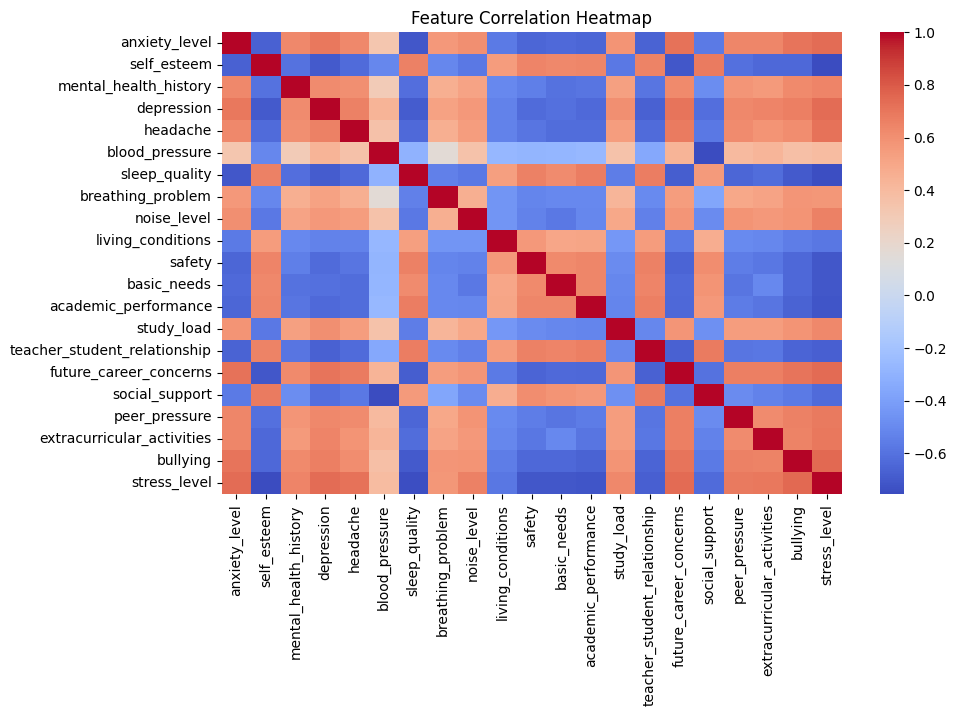

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print(data.isnull().sum())

# Encode categorical columns (if any)
data = pd.get_dummies(data, drop_first=True)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Features and target
X = data.drop("stress_level", axis=1)
y = data["stress_level"]

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# NN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # output layer (multiclass)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,003 (15.64 KB)

 Trainable params: 4,003 (15.64 KB)

 Non-trainable params: 0 (0.00 B)

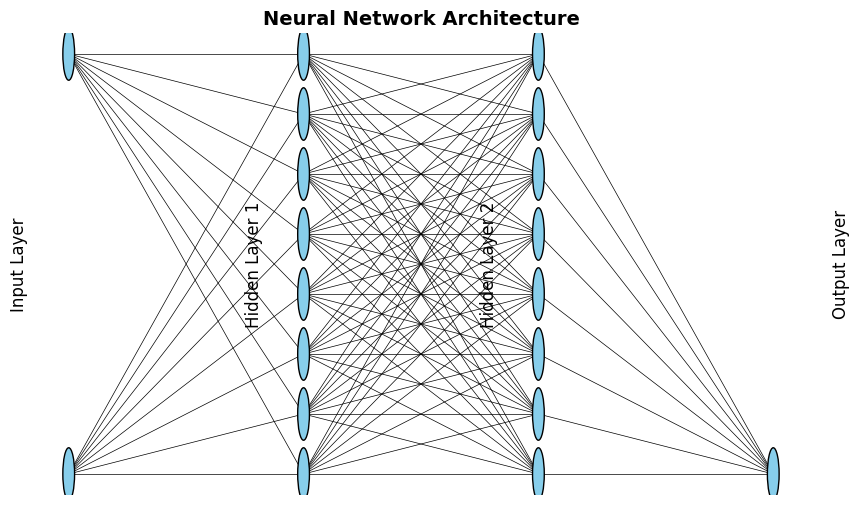

In [42]:
# 7. ANN Architecture Visualization (Neural Network-like Structure)
import matplotlib.pyplot as plt

# Define architecture: input(2), hidden1(8), hidden2(8), output(1)
layer_sizes = [2, 8, 8, 1]

fig, ax = plt.subplots(figsize=(10,6))
ax.axis('off')
ax.set_title("Neural Network Architecture", fontsize=14, fontweight='bold')

# Store neuron coordinates
neuron_coords = []

# Draw neurons
for i, layer_size in enumerate(layer_sizes):
    x = i * 2  # spacing between layers
    y_positions = np.linspace(0.1, 0.9, layer_size)
    layer_coords = []
    for y in y_positions:
        circle = plt.Circle((x, y), 0.05, color='skyblue', ec='black', zorder=3)
        ax.add_artist(circle)
        layer_coords.append((x, y))
    neuron_coords.append(layer_coords)
# Draw connections
for i in range(len(neuron_coords)-1):
    for (x1, y1) in neuron_coords[i]:
        for (x2, y2) in neuron_coords[i+1]:
            ax.plot([x1, x2], [y1, y2], 'k-', lw=0.5, zorder=1)

# Add layer labels
ax.text(-0.5, 0.5, "Input Layer", fontsize=12, va='center', rotation=90)
ax.text(2-0.5, 0.5, "Hidden Layer 1", fontsize=12, va='center', rotation=90)
ax.text(4-0.5, 0.5, "Hidden Layer 2", fontsize=12, va='center', rotation=90)
ax.text(6.5, 0.5, "Output Layer", fontsize=12, va='center', rotation=90)

plt.show()

In [43]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4807 - loss: 0.9667 - val_accuracy: 0.8000 - val_loss: 0.5905
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.5924 - val_accuracy: 0.8864 - val_loss: 0.4096
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8983 - loss: 0.3973 - val_accuracy: 0.8773 - val_loss: 0.3068
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8793 - loss: 0.3299 - val_accuracy: 0.8773 - val_loss: 0.2695
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9042 - loss: 0.2572 - val_accuracy: 0.8727 - val_loss: 0.2563
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8890 - loss: 0.2784 - val_accuracy: 0.8864 - val_loss: 0.2460
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.2707 - val_accuracy: 0.8909 - val_loss: 0.2443
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8969 - loss: 0.2543 - val_accuracy: 0.8909 - val_loss

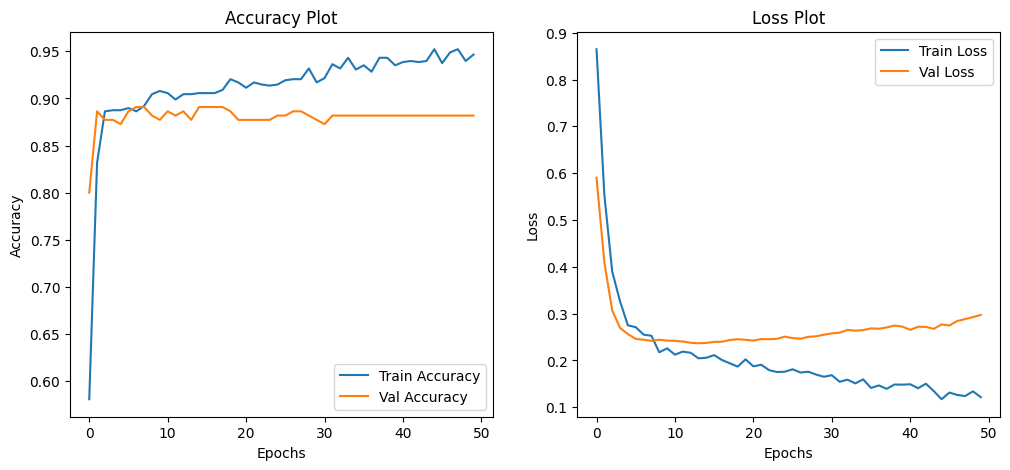

In [44]:
# Accuracy & Loss plots
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Plot")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Plot")

plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


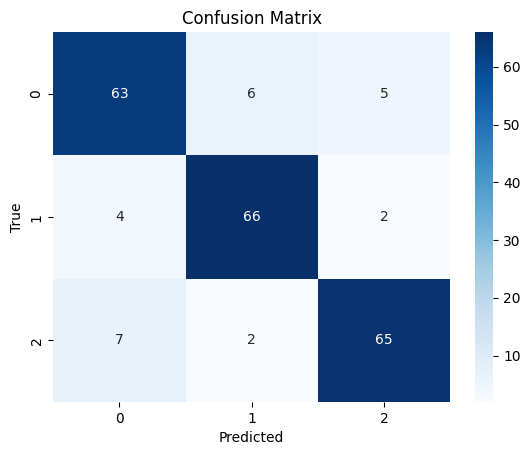

Accuracy: 0.8818181818181818
Precision: 0.8819171444171444
Recall (Sensitivity): 0.8818181818181818
F1 Score: 0.8817559153175591
Specificity per class: {0: np.float64(0.9246575342465754), 1: np.float64(0.9459459459459459), 2: np.float64(0.952054794520548)}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        74
           1       0.89      0.92      0.90        72
           2       0.90      0.88      0.89        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Precision:", precision_score(y_test, y_pred_classes, average='weighted'))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_classes, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_classes, average='weighted'))

# Specificity (TN / (TN+FP)) for each class
specificity = {}
for i in range(len(cm)):
    tn = cm.sum() - (cm[i,:].sum() + cm[:,i].sum() - cm[i,i])
    fp = cm[:,i].sum() - cm[i,i]
    specificity[i] = tn / (tn + fp)
print("Specificity per class:", specificity)

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
